In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Program that can insert your name and ID: (Name: XXXX ID: XXXX)
img = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

window_name = 'image'

font = cv2.FONT_HERSHEY_SIMPLEX

org = (50, 50)

fontScale = 1

color = (255, 0, 0)

thickness = 2

name = input('Enter your name: ')
_id = input('Enter your ID: ')
name_id = '(Name ' + name + ' ID: ' + _id + ')'

img = cv2.putText(img, name_id , org, font, fontScale, color, thickness, cv2.LINE_AA)

cv2.imshow(window_name, img)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [3]:
img = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

cv2.imshow('image1', img)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [4]:
# 2. Program of super resolution
# Nearest neighbor interpolation
img = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

resized = cv2.resize(img, (512, 512), 0, 0, interpolation=cv2.INTER_NEAREST)

cv2.imshow('Original image', img)
cv2.imshow('Nearest neighbor interpolation', resized)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [5]:
# Bilinear Interpolation

def bilinear_interpolation(image, new_height, new_width):
    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # Calculate scaling factors
    scale_x = new_width / width
    scale_y = new_height / height

    # Create a new empty image with the desired dimensions
    new_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Perform bilinear interpolation
    for y in range(new_height):
        for x in range(new_width):
            src_x = x / scale_x
            src_y = y / scale_y

            x1 = int(src_x)
            x2 = x1 + 1 if x1 < width - 1 else x1
            y1 = int(src_y)
            y2 = y1 + 1 if y1 < height - 1 else y1

            dx = src_x - x1
            dy = src_y - y1

            new_image[y, x] = (
                (1 - dx) * (1 - dy) * image[y1, x1] +
                dx * (1 - dy) * image[y1, x2] +
                (1 - dx) * dy * image[y2, x1] +
                dx * dy * image[y2, x2]
            )

    return new_image


image = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

new_height = 512
new_width = 512

interpolated_image = bilinear_interpolation(image, new_height, new_width)

# Display the original and interpolated images
cv2.imshow('Original Image', image)
cv2.imshow('Interpolated Image', interpolated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


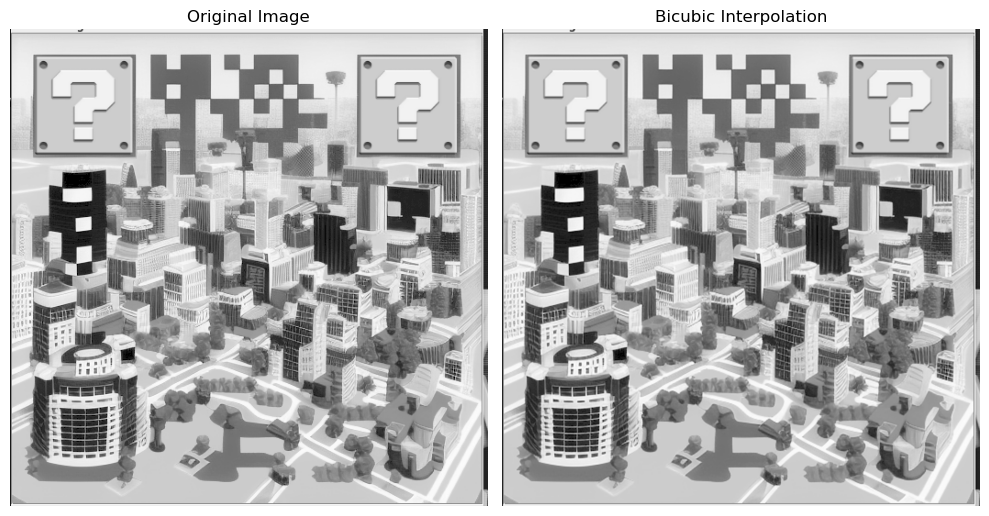

In [6]:
# Bicubic Interpolation

original_image = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR, convert to RGB

# Resize using bicubic interpolation
new_height = 2 * original_image.shape[0]  # Increase the height by a factor of 2
new_width = 2 * original_image.shape[1]   # Increase the width by a factor of 2
bicubic_image = cv2.resize(original_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

# Display the original and bicubic interpolated images using matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bicubic_image)
plt.title('Bicubic Interpolation')
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# 3. Program of gray level resolution of an image 
# 256 128 64 32 16 8 4 2

import cv2
import numpy as np

input_image = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

# List of bit depths
bit_depths = [256, 128, 64, 32, 16, 8, 4, 2]

# Perform gray level resolution for each bit depth
for bits in bit_depths:
    # Calculate the number of levels for the given bit depth
    levels = 2 ** bits

    quantized_image = np.floor(input_image * (levels / 256)) * (256 / levels)
    quantized_image = quantized_image.astype(np.uint8)

    # output_image_path = f'output_image_{bits}_bits.jpg'
    # cv2.imwrite(output_image_path, quantized_image)

    # print(f"Saved {bits}-bit image: {output_image_path}")

print("Gray level resolution done.")


Gray level resolution done.


In [8]:
import cv2
import numpy as np

input_image = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

# List of bit depths
bit_depths = [128,64,32,16,8,4,2,1]

# Create an empty canvas to arrange the output images
canvas_height = input_image.shape[0]
canvas_width = (len(bit_depths) + 1) * input_image.shape[1]
canvas = np.zeros((canvas_height, canvas_width), dtype=np.uint8)

# Place the original image on the canvas
canvas[:, :input_image.shape[1]] = input_image

# Perform gray level resolution for each bit depth and arrange on the canvas
for idx, bits in enumerate(bit_depths, start=1):
    # Calculate the number of levels for the given bit depth
    levels = 2 ** bits

    # Perform grayscale quantization
    quantized_image = np.floor(input_image * (levels / 256)) * (256 / levels)
    quantized_image = quantized_image.astype(np.uint8)

    # Place the quantized image on the canvas
    canvas[:, idx * input_image.shape[1] : (idx + 1) * input_image.shape[1]] = quantized_image

# Save the canvas with all images combined
output_canvas_path = 'output_canvas.jpg'
cv2.imwrite(output_canvas_path, canvas)

print("Combined image saved:", output_canvas_path)


Combined image saved: output_canvas.jpg


In [9]:
import cv2
import numpy as np

input_image = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)

# List of bit depths
bit_depths = [128,64,32,16,8,4,2,1]

# Calculate the number of rows and columns for the grid
num_rows = 2
num_columns = 4

# Calculate the size of each output image in the grid
output_height = input_image.shape[0] // num_rows
output_width = input_image.shape[1] // num_columns

# Create a canvas to arrange the output images in a grid
canvas_height = num_rows * output_height
canvas_width = num_columns * output_width
canvas = np.zeros((canvas_height, canvas_width), dtype=np.uint8)

# Place the quantized images in a grid on the canvas
for idx, bits in enumerate(bit_depths):
    # Calculate the row and column indices for the grid
    row_idx = idx // num_columns
    col_idx = idx % num_columns

    # Calculate the coordinates for placing the image in the grid
    start_row = row_idx * output_height
    end_row = start_row + output_height
    start_col = col_idx * output_width
    end_col = start_col + output_width

    # Perform grayscale quantization
    levels = 2 ** bits
    quantized_image = np.floor(input_image * (levels / 256)) * (256 / levels)
    quantized_image = quantized_image.astype(np.uint8)

    # Resize the quantized image to fit the grid cell size
    quantized_image = cv2.resize(quantized_image, (output_width, output_height))

    # Place the quantized image on the canvas
    canvas[start_row:end_row, start_col:end_col] = quantized_image

# Save the canvas with the arranged images
output_canvas_path = 'output_grid_canvas.jpg'
cv2.imwrite(output_canvas_path, canvas)

print("Grid combined image saved:", output_canvas_path)


Grid combined image saved: output_grid_canvas.jpg


In [11]:
import cv2
import numpy as np

input_image  = cv2.imread('C:/Users/porpu/Desktop/Code/CSS496/image.png', 0)
# List of bit depths
bit_depths = [256, 128, 64, 32, 16, 8, 4, 2]
# bit_depths = [128,64,32,16,8,4,2,1]

# Create an empty canvas for the combined output image
rows = 2
cols = 4
canvas_height = rows * 512
canvas_width = cols * 512
canvas = np.zeros((canvas_height, canvas_width), dtype=np.uint8)

# Place the original image on the canvas
canvas[:512, :512] = cv2.resize(input_image, (512, 512))

# Perform gray level resolution for each bit depth and arrange on the canvas
for idx, bits in enumerate(bit_depths):
    row = idx // cols
    col = idx % cols

    # Calculate the number of levels for the given bit depth
    levels = 2 ** bits

    # Perform grayscale quantization
    quantized_image = np.floor(input_image * (levels / 256)) * (256 / levels)
    quantized_image = quantized_image.astype(np.uint8)

    # Resize quantized image to 512x512 pixels
    quantized_image = cv2.resize(quantized_image, (512, 512))

    # Place the quantized image on the canvas
    canvas[row * 512 : (row + 1) * 512, col * 512 : (col + 1) * 512] = quantized_image

# Save the combined image
output_grid_combined_path = 'output_grid_combined.jpg'
cv2.imwrite(output_grid_combined_path, canvas)

print("Grid combined image saved:", output_grid_combined_path)


Grid combined image saved: output_grid_combined.jpg
